I want to run the iterations from before to see if my reduced features have any effects on the scores and outcomes.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

#May not use these, import them as a matter of course now, just in case I want them.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

#Create dataframe
df = pd.read_csv('abalone.data')
df.columns = ['sex','length','diameter','height','whole weight','shucked weight','viscera weight','shell weight','rings']

#Features deemed excess removed
df.drop(['sex','viscera weight', 'whole weight', 'length','height'], axis=1, inplace=True)

y = df.rings
X = df.drop('rings',axis=1)

0.49807620994
[[ 1.          0.70619693]
 [ 0.70619693  1.        ]]


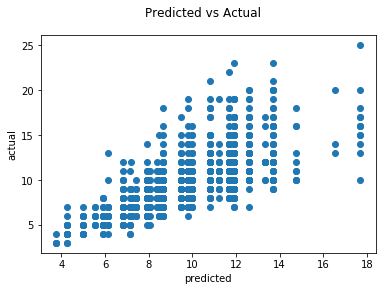

In [4]:
#First, our "perfected" model.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=35, min_samples_leaf=20, random_state=0)

model = regressor.fit(X_train, y_train)

score = model.score(X_test, y_test)

print(score)
print(np.corrcoef(model.predict(X_test), y_test))

plt.scatter(model.predict(X_test), y_test)
plt.suptitle('Predicted vs Actual')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [5]:
#Modifed function for looping.  Using fixed X and y train/test sets.

def regTree(X_train, X_test, y_train, y_test, depth, min_samples_split=2, min_samples_leaf=1):

    model = DecisionTreeRegressor(max_depth=depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=0)
    score = model.fit(X_train, y_train).score(X_test, y_test)
    x = np.corrcoef(model.predict(X_test),y_test)
    corrcoef = x[0,1]
    
    return score, corrcoef

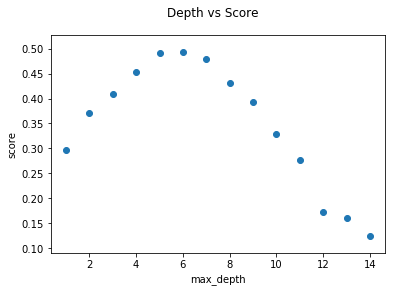

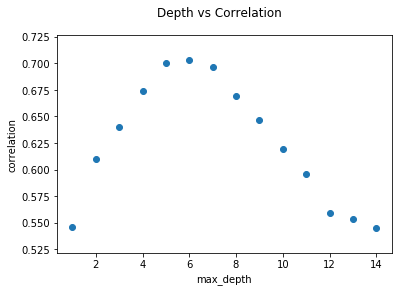

In [6]:
#testing max_depth
scores=[]
correlations = []
depths= list(range(1,15,1))

for depth in depths:
    score, corr = regTree(X_train, X_test, y_train, y_test, depth)
    scores.append(score)
    correlations.append(corr)

plt.scatter(x=depths, y=scores)
plt.suptitle('Depth vs Score')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

plt.scatter(x=depths, y=correlations)
plt.suptitle('Depth vs Correlation')
plt.xlabel('max_depth')
plt.ylabel('correlation')
plt.show()

No big change.  I'll keep it at 5.

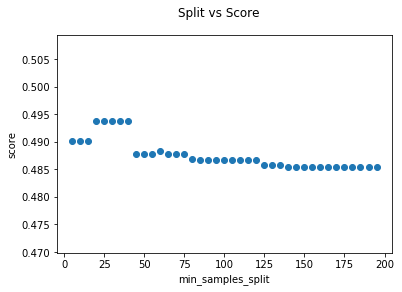

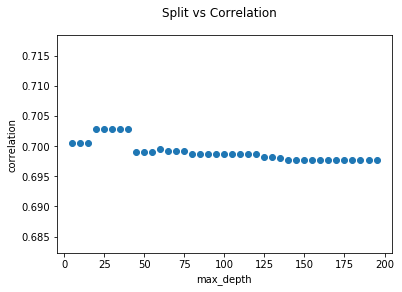

In [9]:
#Testing min_samples_split 

split_scores=[]
correlations = []
splits= list(range(5,200,5))

for split in splits:
    score, corr = regTree(X_train, X_test, y_train, y_test, 5, min_samples_split=split)
    split_scores.append(score)
    correlations.append(corr)

plt.scatter(x=splits, y=split_scores)
plt.suptitle('Split vs Score')
plt.xlabel('min_samples_split')
plt.ylabel('score')
plt.show()

plt.scatter(x=splits, y=correlations)
plt.suptitle('Split vs Correlation')
plt.xlabel('max_depth')
plt.ylabel('correlation')
plt.show()

Interesting!!  I'll put min samples split at 20.

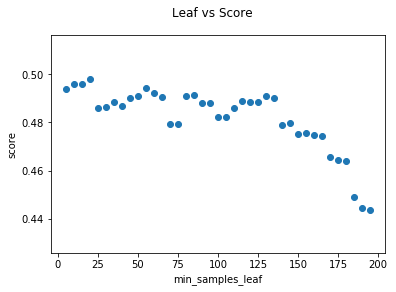

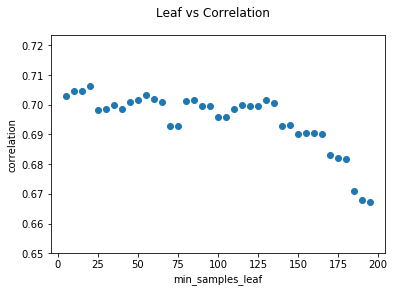

In [10]:
#Testing min_samples_leaf

leaf_scores=[]
correlations = []
leaves = list(range(5,200,5))

for leaf in leaves:
    score, corr = regTree(X_train, X_test, y_train, y_test, 5, 20, min_samples_leaf=leaf)
    leaf_scores.append(score)
    correlations.append(corr)

plt.scatter(x=leaves, y=leaf_scores)
plt.suptitle('Leaf vs Score')
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.show()

plt.scatter(x=leaves, y=correlations)
plt.suptitle('Leaf vs Correlation')
plt.xlabel('min_samples_leaf')
plt.ylabel('correlation')
plt.show()

Keep it at 20, then.
Reiteration with reduced feature set yields ideal tunes of:
Rexamining results. max_depth = 5, min_samples_split = 20, min_samples_leaf = 20

0.49807620994
[[ 1.          0.70619693]
 [ 0.70619693  1.        ]]


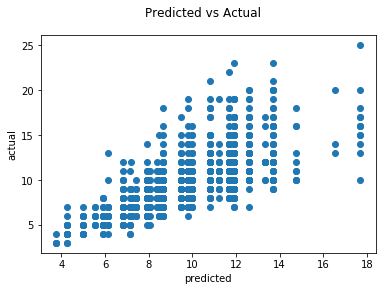

In [11]:
#Let's reroll the model with our new tuning.

regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=20, min_samples_leaf=20, random_state=0)

model = regressor.fit(X_train, y_train)

score = model.score(X_test, y_test)

print(score)
print(np.corrcoef(model.predict(X_test), y_test))

plt.scatter(model.predict(X_test), y_test)
plt.suptitle('Predicted vs Actual')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

I don't know if this is an improvement or not.  But, it's a good start.  I think I've pushed this algorithm as much as I can understand.  I'd like to see what some other algorithms have to offer.